In [172]:
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

In [173]:
# Used imports -- standard imports
import pandas as pd
import cbsodata
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Reading all the cbs data

In [174]:
# Converteer naar een Pandas DataFrame voor gemakkelijke manipulatie
df_algemeen = pd.DataFrame(cbsodata.get_data('83765NED'))

# Converteer naar een Pandas DataFrame voor gemakkelijke manipulatie
df_afstanden = pd.DataFrame(cbsodata.get_data('80305ned'))

# Converteer naar een Pandas DataFrame voor gemakkelijke manipulatie
df_gezondheidsmonitor = pd.DataFrame(cbsodata.get_data('85012NED'))

Gereed maken df_algemeen

In [175]:
df_algemeen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16667 entries, 0 to 16666
Columns: 110 entries, ID to GeweldsEnSeksueleMisdrijven_108
dtypes: float64(65), int64(39), object(6)
memory usage: 14.0+ MB


In [176]:
# Checking for possible values
for col in df_algemeen.columns:
    try:
        print('{} : {}'.format(col,df_algemeen[col].unique()))
    except:
        print(col)

ID : [    0     1     2 ... 16664 16665 16666]
WijkenEnBuurten : ['Nederland' 'Aa en Hunze' 'Wijk 00 Annen' ...
 'Wijk 52 Soestweteringlanden' 'Windesheim' 'Harculo en Hoogzutmen']
Gemeentenaam_1 : ['Nederland                               '
 'Aa en Hunze                             '
 'Aalburg                                 '
 'Aalsmeer                                '
 'Aalten                                  '
 'Achtkarspelen                           '
 'Alblasserdam                            '
 'Albrandswaard                           '
 'Alkmaar                                 '
 'Almelo                                  '
 'Almere                                  '
 'Alphen aan den Rijn                     '
 'Alphen-Chaam                            '
 'Ameland                                 '
 'Amersfoort                              '
 'Amstelveen                              '
 'Amsterdam                               '
 'Apeldoorn                               '
 'Appinged

In [177]:
# Remove trailing spaces from column values
df_algemeen = df_algemeen.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Select only Gemeente specific data
df_algemeen = df_algemeen[(df_algemeen['SoortRegio_2'] == 'Gemeente')]

# Rename columns
df_algemeen.rename(columns={'Gemeentenaam_1': 'Gemeente'}, inplace=True)

# Dropping useless columns
df_algemeen.drop(columns=['ID', 'WijkenEnBuurten', 'SoortRegio_2', 'Codering_3', 'IndelingswijzigingWijkenEnBuurten_4', 'MeestVoorkomendePostcode_102'], inplace=True)

In [178]:
df_algemeen

Gemeente  AantalInwoners_5  Mannen_6  Vrouwen_7  k_0Tot15Jaar_8  \
1          Aa en Hunze             25286     12603      12683            3572   
77             Aalburg             13067      6615       6452            2527   
100           Aalsmeer             31373     15516      15857            5866   
113             Aalten             27047     13625      13422            4459   
147      Achtkarspelen             27893     14185      13708            5112   
...                ...               ...       ...        ...             ...   
16374          Zundert             21657     11121      10536            2903   
16391          Zutphen             47340     23223      24117            7643   
16429  Zwartewaterland             22309     11360      10949            4728   
16470      Zwijndrecht             44417     21559      22858            7238   
16572           Zwolle            125548     61727      63821           22964   

       k_15Tot25Jaar_9  k_25Tot45Jaar_10  k_45Tot65Jaar_11  \
1                 2558              4383              8467   
77                1760              3006              3584   
100               3484              7221              9089   
113               2963              5641              8259   
147               3284              6404              7891   
...                ...               ...               ...   
16374             2589              4663              6995   
16391             5417             10501             14299   
16429             3043              5375              5571   
16470             4981             10352             12086   
16572            15916             35936             31950   

       k_65JaarOfOuder_12  Ongehuwd_13  ...  ScholenBinnen3Km_98  \
1                    6306         9951  ...                  1.8   
77                   2190         5639  ...                  2.5   
100                  5713        14718  ...                  4.4   
113                  5725        12044  ...                  4.6   
147                  5202        12565  ...                  3.5   
...                   ...          ...  ...                  ...   
16374                4507         9488  ...                  2.2   
16391                9480        21863  ...                 11.8   
16429                3592         9697  ...                  5.0   
16470                9760        18860  ...                 11.2   
16572               18782        65865  ...                 11.1   

       OppervlakteTotaal_99  OppervlakteLand_100  OppervlakteWater_101  \
1                     27887                27625                   262   
77                     5317                 5041                   276   
100                    3229                 2013                  1216   
113                    9705                 9654                    52   
147                   10398                10226                   172   
...                     ...                  ...                   ...   
16374                 12121                12070                    51   
16391                  4293                 4096                   197   
16429                  8786                 8267                   518   
16470                  2277                 2035                   243   
16572                 11936                11131                   805   

       Dekkingspercentage_103  MateVanStedelijkheid_104  \
1                         NaN                       5.0   
77                        NaN                       5.0   
100                       NaN                       4.0   
113                       NaN                       4.0   
147                       NaN                       5.0   
...                       ...                       ...   
16374                     NaN                       4.0   
16391                     NaN                       2.0   
16429                     NaN                       4.0   


In [179]:
# Remove all _number
df_algemeen.columns = df_algemeen.columns.str.replace('_\d+', '', regex=True)

In [180]:
# Remove specific columns what tell information about energie & aardgas verbruik, but those colums exist on avarage use.
df_algemeen.drop(columns=['Appartement', 'Tussenwoning', 'Hoekwoning', 'TweeOnderEenKapWoning', 'VrijstaandeWoning', 'Huurwoning', 'EigenWoning'], inplace=True)

<Axes: >

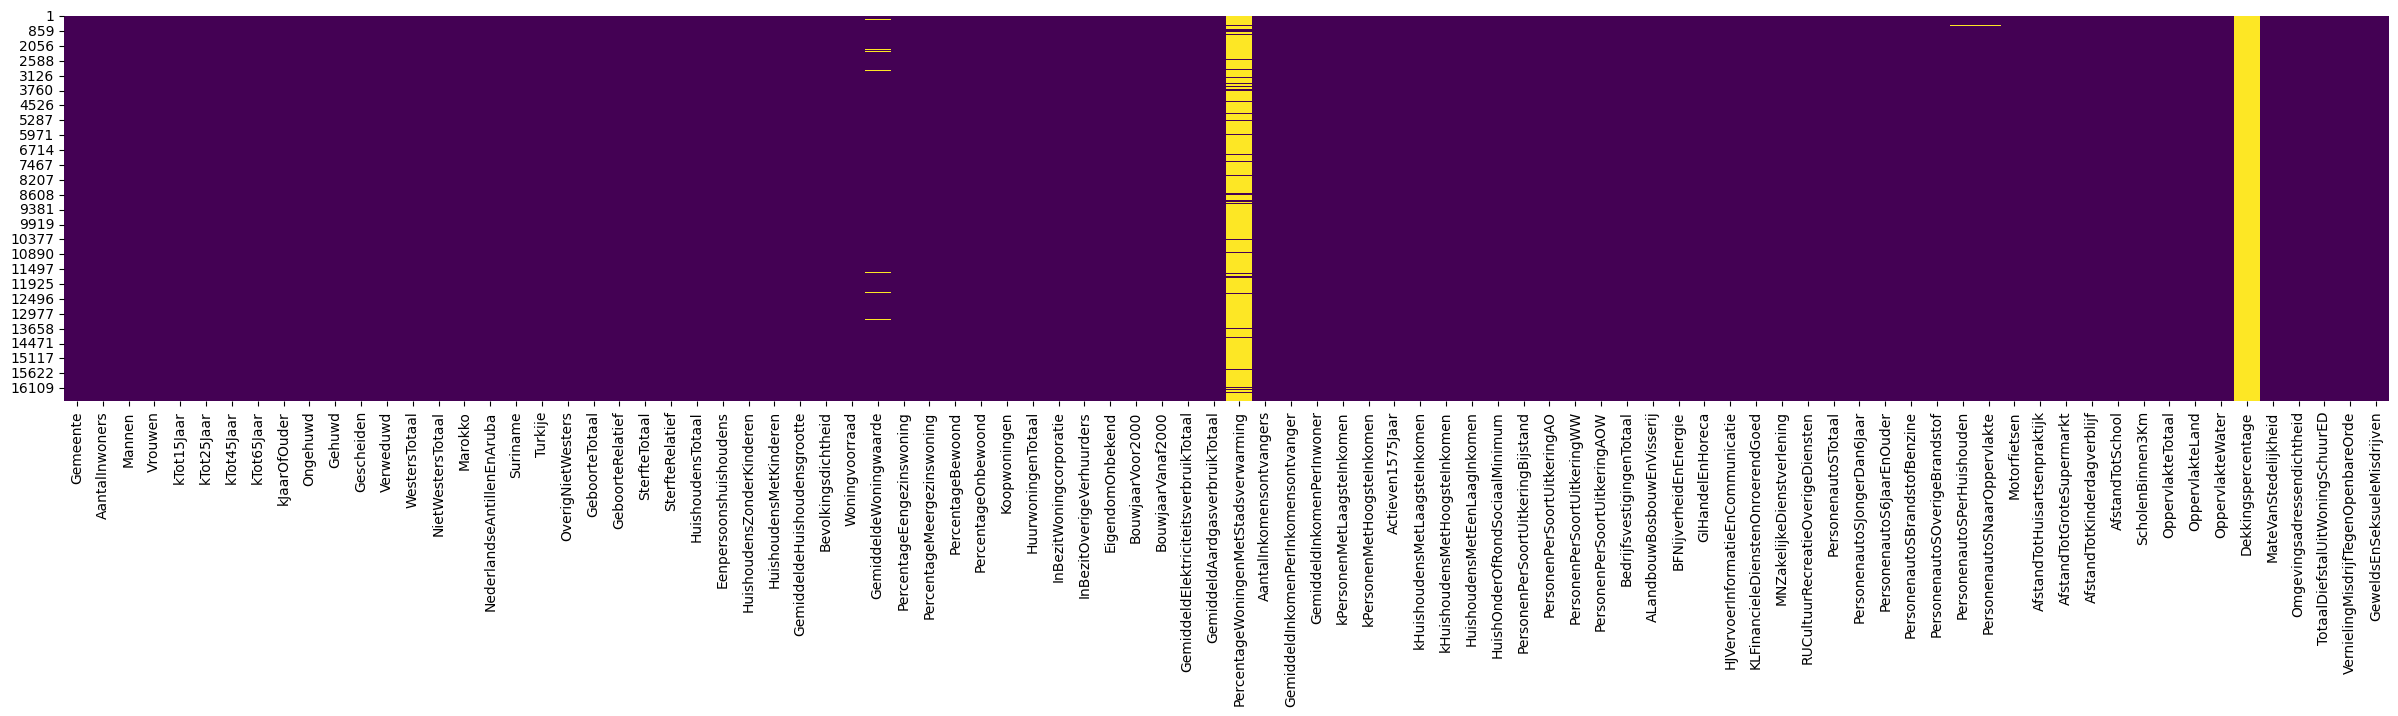

In [181]:
# View a plot with all NaN values Yellow
fig, ax = plt.subplots(figsize=(30, 5))
sns.heatmap(df_algemeen.isnull(),cbar=False,cmap='viridis')

In [182]:
# Drop columns with only NaN
df_algemeen.drop(columns=['PercentageWoningenMetStadsverwarming', 'Dekkingspercentage'], inplace=True)

# Filling missing data with avg
df_algemeen['GemiddeldeWoningwaarde'].fillna((df_algemeen['GemiddeldeWoningwaarde'].mean()), inplace=True)

Gereed maken df_afstanden

In [183]:
df_afstanden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9452 entries, 0 to 9451
Columns: 128 entries, ID to AfstandTotBrandweerkazerne_125
dtypes: float64(125), int64(1), object(2)
memory usage: 9.2+ MB


In [184]:
# Checking for possible values
for col in df_afstanden.columns:
    try:
        print('{} : {}'.format(col,df_afstanden[col].unique()))
    except:
        print(col)

ID : [   0    1    2 ... 9449 9450 9451]
RegioS : ['Nederland' 'Noord-Nederland (LD)' 'Oost-Nederland (LD)'
 'West-Nederland (LD)' 'Zuid-Nederland (LD)' 'Groningen (PV)'
 'Fryslân (PV)' 'Drenthe (PV)' 'Overijssel (PV)' 'Flevoland (PV)'
 'Gelderland (PV)' 'Utrecht (PV)' 'Noord-Holland (PV)' 'Zuid-Holland (PV)'
 'Zeeland (PV)' 'Noord-Brabant (PV)' 'Limburg (PV)' 'Oost-Groningen (CR)'
 'Delfzijl en omgeving (CR)' 'Overig Groningen (CR)'
 'Noord-Friesland (CR)' 'Zuidwest-Friesland (CR)'
 'Zuidoost-Friesland (CR)' 'Noord-Drenthe (CR)' 'Zuidoost-Drenthe (CR)'
 'Zuidwest-Drenthe (CR)' 'Noord-Overijssel (CR)'
 'Zuidwest-Overijssel (CR)' 'Twente (CR)' 'Veluwe (CR)' 'Achterhoek (CR)'
 'Arnhem/Nijmegen (CR)' 'Zuidwest-Gelderland (CR)' 'Utrecht (CR)'
 'Kop van Noord-Holland (CR)' 'Alkmaar en omgeving (CR)' 'IJmond (CR)'
 'Agglomeratie Haarlem (CR)' 'Zaanstreek (CR)' 'Groot-Amsterdam (CR)'
 'Het Gooi en Vechtstreek (CR)' 'Agglomeratie Leiden en Bollenstreek (CR)'
 "Agglomeratie 's-Gravenhage (CR)" 

In [185]:
# Rename columns
df_afstanden.rename(columns={'RegioS': 'Gemeente'}, inplace=True)

# Replace values
df_afstanden["Gemeente"] = df_afstanden["Gemeente"].replace("Beek (L.)", "Beek")
df_afstanden["Gemeente"] = df_afstanden["Gemeente"].replace("Stein (L.)", "Stein")

# Separate Beekdaelen into 3 sepereate gemeentes
# beekdaelen = df_afstanden.loc[df_afstanden['Gemeente'] == 'Beekdaelen']

# schinnen_copy = beekdaelen.copy()
# schinnen_copy["Gemeente"] = beekdaelen["Gemeente"].replace("Beekdaelen", "Schinnen")
# 
# nuth_copy = beekdaelen.copy()
# nuth_copy["Gemeente"] = beekdaelen["Gemeente"].replace("Beekdaelen", "Nuth")
# 
# onderbanken_copy = beekdaelen.copy()
# onderbanken_copy["Gemeente"] = beekdaelen["Gemeente"].replace("Beekdaelen", "Onderbanken")

# Concatenate the copies to the original DataFrame
# df_afstanden = pd.concat([df_afstanden, schinnen_copy, nuth_copy, onderbanken_copy], ignore_index=True)

# Dropping useless columns
df_afstanden.drop(columns=['ID'], inplace=True)

<Axes: >

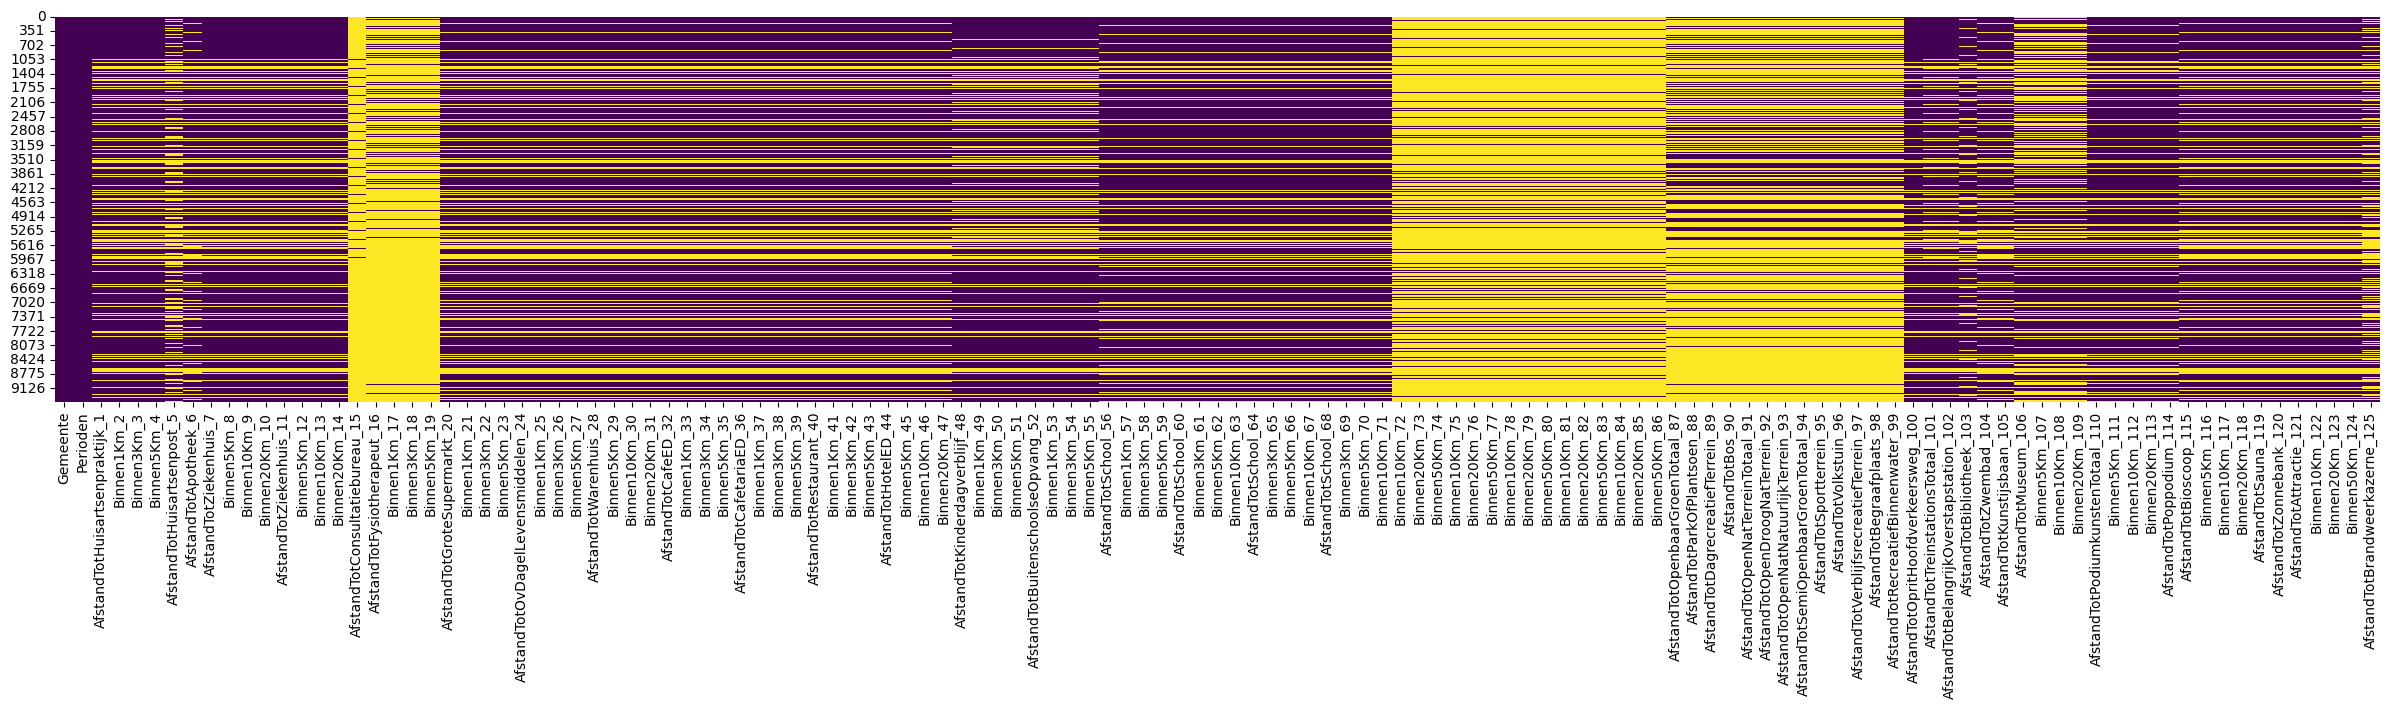

In [186]:
# View a plot with all NaN values Yellow
fig, ax = plt.subplots(figsize=(30, 5))
sns.heatmap(df_afstanden.isnull(),cbar=False,cmap='viridis')

In [187]:
# Sort the DataFrame by gemeente and perioden columns
df_afstanden = df_afstanden.sort_values(['Gemeente', 'Perioden'])

# Group the DataFrame by gemeente
grouped = df_afstanden.groupby('Gemeente')

# Fill missing values with data from the closest year
df_afstanden = grouped.apply(lambda group: group.fillna(method='bfill').fillna(method='ffill'))

# Reset the index to ungroup the DataFrame
df_afstanden = df_afstanden.reset_index(drop=True)

In [188]:
# Remove all _number
df_afstanden.columns = df_afstanden.columns.str.replace('_\d+', '', regex=True)

In [189]:
# Drop columns what are already defined in df algemeen
df_afstanden.drop(columns=[
    'AfstandTotHuisartsenpraktijk',
    'AfstandTotGroteSupermarkt',
    'AfstandTotKinderdagverblijf',
    'AfstandTotSchool',
    'AfstandTotSchool',
    'AfstandTotSchool',
    'AfstandTotSchool',
    'AfstandTotZiekenhuis'
], inplace=True)



Gereed maken df_gezondheidsmonitor

In [190]:
df_gezondheidsmonitor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3582 entries, 0 to 3581
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    3582 non-null   int64  
 1   Leeftijd                              3582 non-null   object 
 2   Marges                                3582 non-null   object 
 3   RegioS                                3582 non-null   object 
 4   ErvarenGezondheidGoedZeerGoed_1       3564 non-null   float64
 5   EenOfMeerLangdurigeAandoeningen_2     3561 non-null   float64
 6   EenOfMeerLichamelijkeBeperkingen_3    3561 non-null   float64
 7   BeperkingInHoren_4                    3561 non-null   float64
 8   BeperkingInZien_5                     3561 non-null   float64
 9   BeperkingInBewegen_6                  3561 non-null   float64
 10  Ondergewicht_7                        3552 non-null   float64
 11  NormaalGewicht_8 

In [191]:
# Checking for possible values
for col in df_gezondheidsmonitor.columns:
    try:
        print('{} : {}'.format(col,df_gezondheidsmonitor[col].unique()))
    except:
        print(col)

ID : [   0    1    2 ... 3579 3580 3581]
Leeftijd : ['Totaal' '18 tot 65 jaar' '65 jaar of ouder']
Marges : ['Waarde' 'Ondergrens 95%-interval' 'Bovengrens 95%-interval']
RegioS : ['Nederland' 'Noord-Nederland (LD)' 'Oost-Nederland (LD)'
 'West-Nederland (LD)' 'Zuid-Nederland (LD)' 'Groningen (PV)'
 'Fryslân (PV)' 'Drenthe (PV)' 'Overijssel (PV)' 'Flevoland (PV)'
 'Gelderland (PV)' 'Utrecht (PV)' 'Noord-Holland (PV)' 'Zuid-Holland (PV)'
 'Zeeland (PV)' 'Noord-Brabant (PV)' 'Limburg (PV)' 'Aa en Hunze'
 'Aalsmeer' 'Aalten' 'Achtkarspelen' 'Alblasserdam' 'Albrandswaard'
 'Alkmaar' 'Almelo' 'Almere' 'Alphen aan den Rijn' 'Alphen-Chaam' 'Altena'
 'Ameland' 'Amersfoort' 'Amstelveen' 'Amsterdam' 'Apeldoorn' 'Appingedam'
 'Arnhem' 'Assen' 'Asten' 'Baarle-Nassau' 'Baarn' 'Barendrecht'
 'Barneveld' 'Beek (L.)' 'Beekdaelen' 'Beemster' 'Beesel' 'Berg en Dal'
 'Bergeijk' 'Bergen (L.)' 'Bergen (NH.)' 'Bergen op Zoom' 'Berkelland'
 'Bernheze' 'Best' 'Beuningen' 'Beverwijk' 'De Bilt' 'Bladel' 'Blaric

In [192]:
# Rename columns
df_gezondheidsmonitor.rename(columns={'RegioS': 'Gemeente'}, inplace=True)

# Replace values
df_gezondheidsmonitor["Gemeente"] = df_gezondheidsmonitor["Gemeente"].replace("Beek (L.)", "Beek")
df_gezondheidsmonitor["Gemeente"] = df_gezondheidsmonitor["Gemeente"].replace("Stein (L.)", "Stein")

# Separate Beekdaelen into 3 sepereate gemeentes
beekdaelen = df_gezondheidsmonitor.loc[df_gezondheidsmonitor['Gemeente'] == 'Beekdaelen']

schinnen_copy = beekdaelen.copy()
schinnen_copy["Gemeente"] = beekdaelen["Gemeente"].replace("Beekdaelen", "Schinnen")

nuth_copy = beekdaelen.copy()
nuth_copy["Gemeente"] = beekdaelen["Gemeente"].replace("Beekdaelen", "Nuth")

onderbanken_copy = beekdaelen.copy()
onderbanken_copy["Gemeente"] = beekdaelen["Gemeente"].replace("Beekdaelen", "Onderbanken")

# Concatenate the copies to the original DataFrame
df_gezondheidsmonitor = pd.concat([df_gezondheidsmonitor, schinnen_copy, nuth_copy, onderbanken_copy], ignore_index=True)

# Verkijg alle leeftijds categorieën (aangezien deze niet specifiek genoeg zijn)
df_gezondheidsmonitor = df_gezondheidsmonitor[df_gezondheidsmonitor['Leeftijd'] == 'Totaal']

# Verkijg enkel de marges
df_gezondheidsmonitor = df_gezondheidsmonitor[df_gezondheidsmonitor['Marges'] == 'Waarde']

# Dropping useless columns
df_gezondheidsmonitor.drop(columns=['ID', 'Leeftijd', 'Marges'], inplace=True)

In [193]:
df_gezondheidsmonitor

Gemeente  ErvarenGezondheidGoedZeerGoed_1  \
0                         Nederland                             79.1   
1              Noord-Nederland (LD)                             79.3   
2               Oost-Nederland (LD)                             79.7   
3               West-Nederland (LD)                             79.4   
4               Zuid-Nederland (LD)                             77.4   
...                             ...                              ...   
396                GGD Fryslân (GG)                             80.7   
397   GGD Zaanstreek/Waterland (GG)                             78.8   
3582                       Schinnen                             73.7   
3591                           Nuth                             73.7   
3600                    Onderbanken                             73.7   

      EenOfMeerLangdurigeAandoeningen_2  EenOfMeerLichamelijkeBeperkingen_3  \
0                                  32.2                                14.5   
1                                  33.2                                13.6   
2                                  32.6                                14.2   
3                                  31.3                                14.1   
4                                  33.2                                15.9   
...                                 ...                                 ...   
396                                32.9                                12.8   
397                                33.4                                14.4   
3582                               37.2                                16.9   
3591                               37.2                                16.9   
3600                               37.2                                16.9   

      BeperkingInHoren_4  BeperkingInZien_5  BeperkingInBewegen_6  \
0                    4.4                5.4                   9.0   
1                    3.9                4.6                   8.9   
2                    4.4                5.0                   8.6   
3                    4.2                5.4                   8.9   
4                    5.0                5.9                   9.9   
...                  ...                ...                   ...   
396                  3.6                4.4                   8.2   
397                  3.6                5.9                   8.7   
3582                 5.8                5.6                  10.7   
3591                 5.8                5.6                  10.7   
3600                 5.8                5.6                  10.7   

      Ondergewicht_7  NormaalGewicht_8  Overgewicht_9  ...  \
0                1.7              48.8           49.4  ...   
1                1.6              47.0           51.4  ...   
2                1.5              47.3           51.2  ...   
3                1.9              50.8           47.4  ...   
4                1.7              46.9           51.5  ...   
...              ...               ...            ...  ...   
396              1.6              47.4           51.0  ...   
397              1.3              46.5           52.2  ...   
3582             1.4              43.0           55.6  ...   
3591             1.4              43.0           55.6  ...   
3600             1.4              43.0           55.6  ...   

      ErnstigOvergewichtObesitas_11  VoldoetAanBeweegrichtlijn_12  \
0                              14.7                          50.4   
1                              15.4                          51.0   
2                              15.4                          51.1   
3                              13.8                           NaN   
4                              15.7                          48.9   
...                             ...                           ...   
396                            14.5                          53.7   
397                            16.0                          46.7   
3582              

In [194]:
# Remove all _number
df_gezondheidsmonitor.columns = df_gezondheidsmonitor.columns.str.replace('_\d+', '', regex=True)

Merge dataframes

In [195]:
# Perform the first merge between df1 and df2
df_cbsodata = pd.merge(df_algemeen, df_afstanden, on="Gemeente", how="inner")

# Perform the second merge between the result of the first merge and df3
df_cbsodata = pd.merge(df_cbsodata, df_gezondheidsmonitor, on="Gemeente", how="inner")

In [196]:
df_cbsodata

Gemeente  AantalInwoners  Mannen  Vrouwen  kTot15Jaar  kTot25Jaar  \
0     Aa en Hunze           25286   12603    12683        3572        2558   
1     Aa en Hunze           25286   12603    12683        3572        2558   
2     Aa en Hunze           25286   12603    12683        3572        2558   
3     Aa en Hunze           25286   12603    12683        3572        2558   
4     Aa en Hunze           25286   12603    12683        3572        2558   
...           ...             ...     ...      ...         ...         ...   
5758       Zwolle          125548   61727    63821       22964       15916   
5759       Zwolle          125548   61727    63821       22964       15916   
5760       Zwolle          125548   61727    63821       22964       15916   
5761       Zwolle          125548   61727    63821       22964       15916   
5762       Zwolle          125548   61727    63821       22964       15916   

      kTot45Jaar  kTot65Jaar  kJaarOfOuder  Ongehuwd  ...  \
0           4383        8467          6306      9951  ...   
1           4383        8467          6306      9951  ...   
2           4383        8467          6306      9951  ...   
3           4383        8467          6306      9951  ...   
4           4383        8467          6306      9951  ...   
...          ...         ...           ...       ...  ...   
5758       35936       31950         18782     65865  ...   
5759       35936       31950         18782     65865  ...   
5760       35936       31950         18782     65865  ...   
5761       35936       31950         18782     65865  ...   
5762       35936       31950         18782     65865  ...   

      ErnstigOvergewichtObesitas  VoldoetAanBeweegrichtlijn  WekelijksSporter  \
0                           14.9                       47.3              48.3   
1                           14.9                       47.3              48.3   
2                           14.9                       47.3              48.3   
3                           14.9                       47.3              48.3   
4                           14.9                       47.3              48.3   
...                          ...                        ...               ...   
5758                        11.0                       54.6              54.4   
5759                        11.0                       54.6              54.4   
5760                        11.0                       54.6              54.4   
5761                        11.0                       54.6              54.4   
5762                        11.0                       54.6              54.4   

      Mantelzorger  ZwaarBelasteMantelzorgers  UrenMantelzorgPerWeek  Rokers  \
0             16.1                       17.1                    9.3    14.3   
1             16.1                       17.1                    9.3    14.3   
2             16.1                       17.1                    9.3    14.3   
3             16.1                       17.1                    9.3    14.3   
4             16.1                       17.1                    9.3    14.3   
...            ...                        ...                    ...     ...   
5758          13.1                       12.2                   11.3    17.6   
5759          13.1                       12.2                   11.3    17.6   
5760          13.1                       12.2                   11.3    17.6   
5761          13.1                       12.2                   11.3    17.6   
5762          13.1                       12.2                   11.3    17.6   

      VoldoetAanRichtlijnAlcoholgebruik  ZwareDrinker  OvermatigDrinker  
0                                  40.6           7.1               5.4  
1                                  40.6           7.1               5.4  
2                                  40.6           7.1               5.4  
3                                  40.6           7.1               5.4  
4                                  

<Axes: >

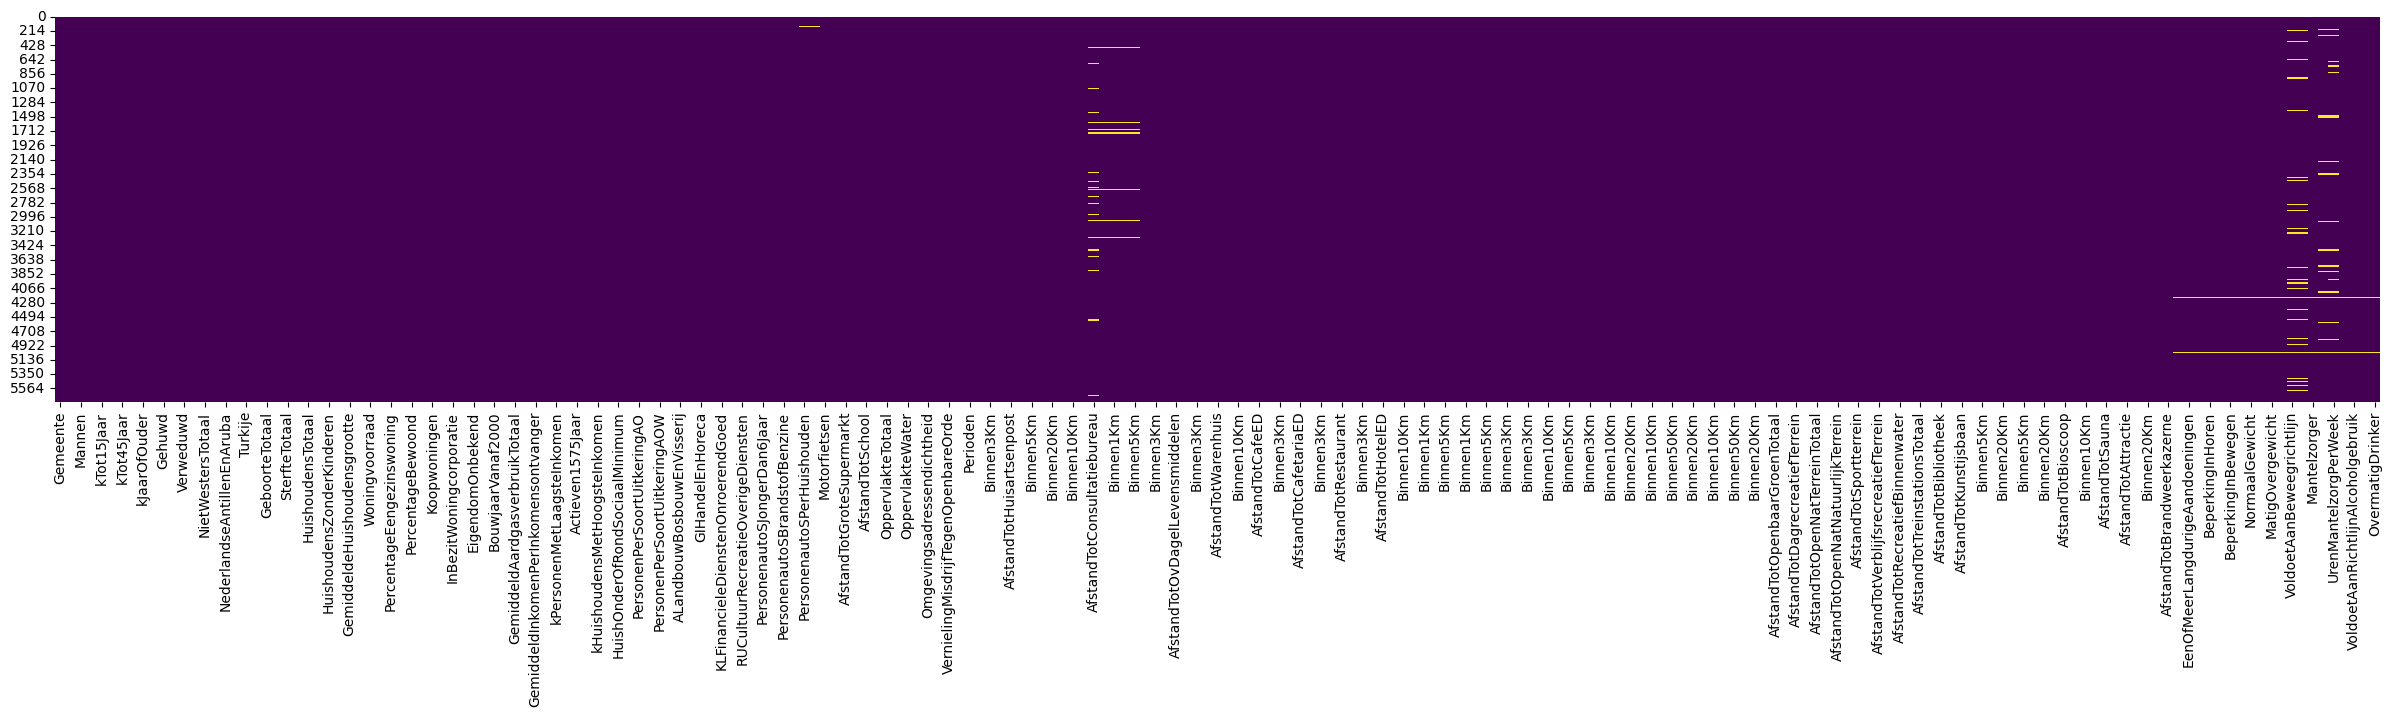

In [197]:
# View a plot with all NaN values Yellow
fig, ax = plt.subplots(figsize=(30, 5))
sns.heatmap(df_cbsodata.isnull(),cbar=False,cmap='viridis')

In [198]:
df_cbsodata

Gemeente  AantalInwoners  Mannen  Vrouwen  kTot15Jaar  kTot25Jaar  \
0     Aa en Hunze           25286   12603    12683        3572        2558   
1     Aa en Hunze           25286   12603    12683        3572        2558   
2     Aa en Hunze           25286   12603    12683        3572        2558   
3     Aa en Hunze           25286   12603    12683        3572        2558   
4     Aa en Hunze           25286   12603    12683        3572        2558   
...           ...             ...     ...      ...         ...         ...   
5758       Zwolle          125548   61727    63821       22964       15916   
5759       Zwolle          125548   61727    63821       22964       15916   
5760       Zwolle          125548   61727    63821       22964       15916   
5761       Zwolle          125548   61727    63821       22964       15916   
5762       Zwolle          125548   61727    63821       22964       15916   

      kTot45Jaar  kTot65Jaar  kJaarOfOuder  Ongehuwd  ...  \
0           4383        8467          6306      9951  ...   
1           4383        8467          6306      9951  ...   
2           4383        8467          6306      9951  ...   
3           4383        8467          6306      9951  ...   
4           4383        8467          6306      9951  ...   
...          ...         ...           ...       ...  ...   
5758       35936       31950         18782     65865  ...   
5759       35936       31950         18782     65865  ...   
5760       35936       31950         18782     65865  ...   
5761       35936       31950         18782     65865  ...   
5762       35936       31950         18782     65865  ...   

      ErnstigOvergewichtObesitas  VoldoetAanBeweegrichtlijn  WekelijksSporter  \
0                           14.9                       47.3              48.3   
1                           14.9                       47.3              48.3   
2                           14.9                       47.3              48.3   
3                           14.9                       47.3              48.3   
4                           14.9                       47.3              48.3   
...                          ...                        ...               ...   
5758                        11.0                       54.6              54.4   
5759                        11.0                       54.6              54.4   
5760                        11.0                       54.6              54.4   
5761                        11.0                       54.6              54.4   
5762                        11.0                       54.6              54.4   

      Mantelzorger  ZwaarBelasteMantelzorgers  UrenMantelzorgPerWeek  Rokers  \
0             16.1                       17.1                    9.3    14.3   
1             16.1                       17.1                    9.3    14.3   
2             16.1                       17.1                    9.3    14.3   
3             16.1                       17.1                    9.3    14.3   
4             16.1                       17.1                    9.3    14.3   
...            ...                        ...                    ...     ...   
5758          13.1                       12.2                   11.3    17.6   
5759          13.1                       12.2                   11.3    17.6   
5760          13.1                       12.2                   11.3    17.6   
5761          13.1                       12.2                   11.3    17.6   
5762          13.1                       12.2                   11.3    17.6   

      VoldoetAanRichtlijnAlcoholgebruik  ZwareDrinker  OvermatigDrinker  
0                                  40.6           7.1               5.4  
1                                  40.6           7.1               5.4  
2                                  40.6           7.1               5.4  
3                                  40.6           7.1               5.4  
4                                  

In [199]:
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

# fit on the dataset
imputer.fit(df_cbsodata.drop(columns=['Gemeente']))

# transform the dataset
Xtrans = imputer.transform(df_cbsodata.drop(columns=['Gemeente']))

# Convert the transformed array (Xtrans) back to a DataFrame
df_filled = pd.DataFrame(Xtrans, columns=df_cbsodata.drop(columns=['Gemeente']).columns)

# Add the 'Gemeente' column back to the filled DataFrame
df_filled['Gemeente'] = df_cbsodata['Gemeente']

# Reorder the columns to match the original DataFrame
df_cbsodata = df_filled[df_cbsodata.columns]

In [200]:
df_cbsodata

Gemeente  AantalInwoners   Mannen  Vrouwen  kTot15Jaar  kTot25Jaar  \
0     Aa en Hunze         25286.0  12603.0  12683.0      3572.0      2558.0   
1     Aa en Hunze         25286.0  12603.0  12683.0      3572.0      2558.0   
2     Aa en Hunze         25286.0  12603.0  12683.0      3572.0      2558.0   
3     Aa en Hunze         25286.0  12603.0  12683.0      3572.0      2558.0   
4     Aa en Hunze         25286.0  12603.0  12683.0      3572.0      2558.0   
...           ...             ...      ...      ...         ...         ...   
5758       Zwolle        125548.0  61727.0  63821.0     22964.0     15916.0   
5759       Zwolle        125548.0  61727.0  63821.0     22964.0     15916.0   
5760       Zwolle        125548.0  61727.0  63821.0     22964.0     15916.0   
5761       Zwolle        125548.0  61727.0  63821.0     22964.0     15916.0   
5762       Zwolle        125548.0  61727.0  63821.0     22964.0     15916.0   

      kTot45Jaar  kTot65Jaar  kJaarOfOuder  Ongehuwd  ...  \
0         4383.0      8467.0        6306.0    9951.0  ...   
1         4383.0      8467.0        6306.0    9951.0  ...   
2         4383.0      8467.0        6306.0    9951.0  ...   
3         4383.0      8467.0        6306.0    9951.0  ...   
4         4383.0      8467.0        6306.0    9951.0  ...   
...          ...         ...           ...       ...  ...   
5758     35936.0     31950.0       18782.0   65865.0  ...   
5759     35936.0     31950.0       18782.0   65865.0  ...   
5760     35936.0     31950.0       18782.0   65865.0  ...   
5761     35936.0     31950.0       18782.0   65865.0  ...   
5762     35936.0     31950.0       18782.0   65865.0  ...   

      ErnstigOvergewichtObesitas  VoldoetAanBeweegrichtlijn  WekelijksSporter  \
0                           14.9                       47.3              48.3   
1                           14.9                       47.3              48.3   
2                           14.9                       47.3              48.3   
3                           14.9                       47.3              48.3   
4                           14.9                       47.3              48.3   
...                          ...                        ...               ...   
5758                        11.0                       54.6              54.4   
5759                        11.0                       54.6              54.4   
5760                        11.0                       54.6              54.4   
5761                        11.0                       54.6              54.4   
5762                        11.0                       54.6              54.4   

      Mantelzorger  ZwaarBelasteMantelzorgers  UrenMantelzorgPerWeek  Rokers  \
0             16.1                       17.1                    9.3    14.3   
1             16.1                       17.1                    9.3    14.3   
2             16.1                       17.1                    9.3    14.3   
3             16.1                       17.1                    9.3    14.3   
4             16.1                       17.1                    9.3    14.3   
...            ...                        ...                    ...     ...   
5758          13.1                       12.2                   11.3    17.6   
5759          13.1                       12.2                   11.3    17.6   
5760          13.1                       12.2                   11.3    17.6   
5761          13.1                       12.2                   11.3    17.6   
5762          13.1                       12.2                   11.3    17.6   

      VoldoetAanRichtlijnAlcoholgebruik  ZwareDrinker  OvermatigDrinker  
0                                  40.6           7.1               5.4  
1                                  40.6           7.1               5.4  
2                                  40.6           7.1               5.4  
3                                  40.6           7.1               5.4  
4                      

<Axes: >

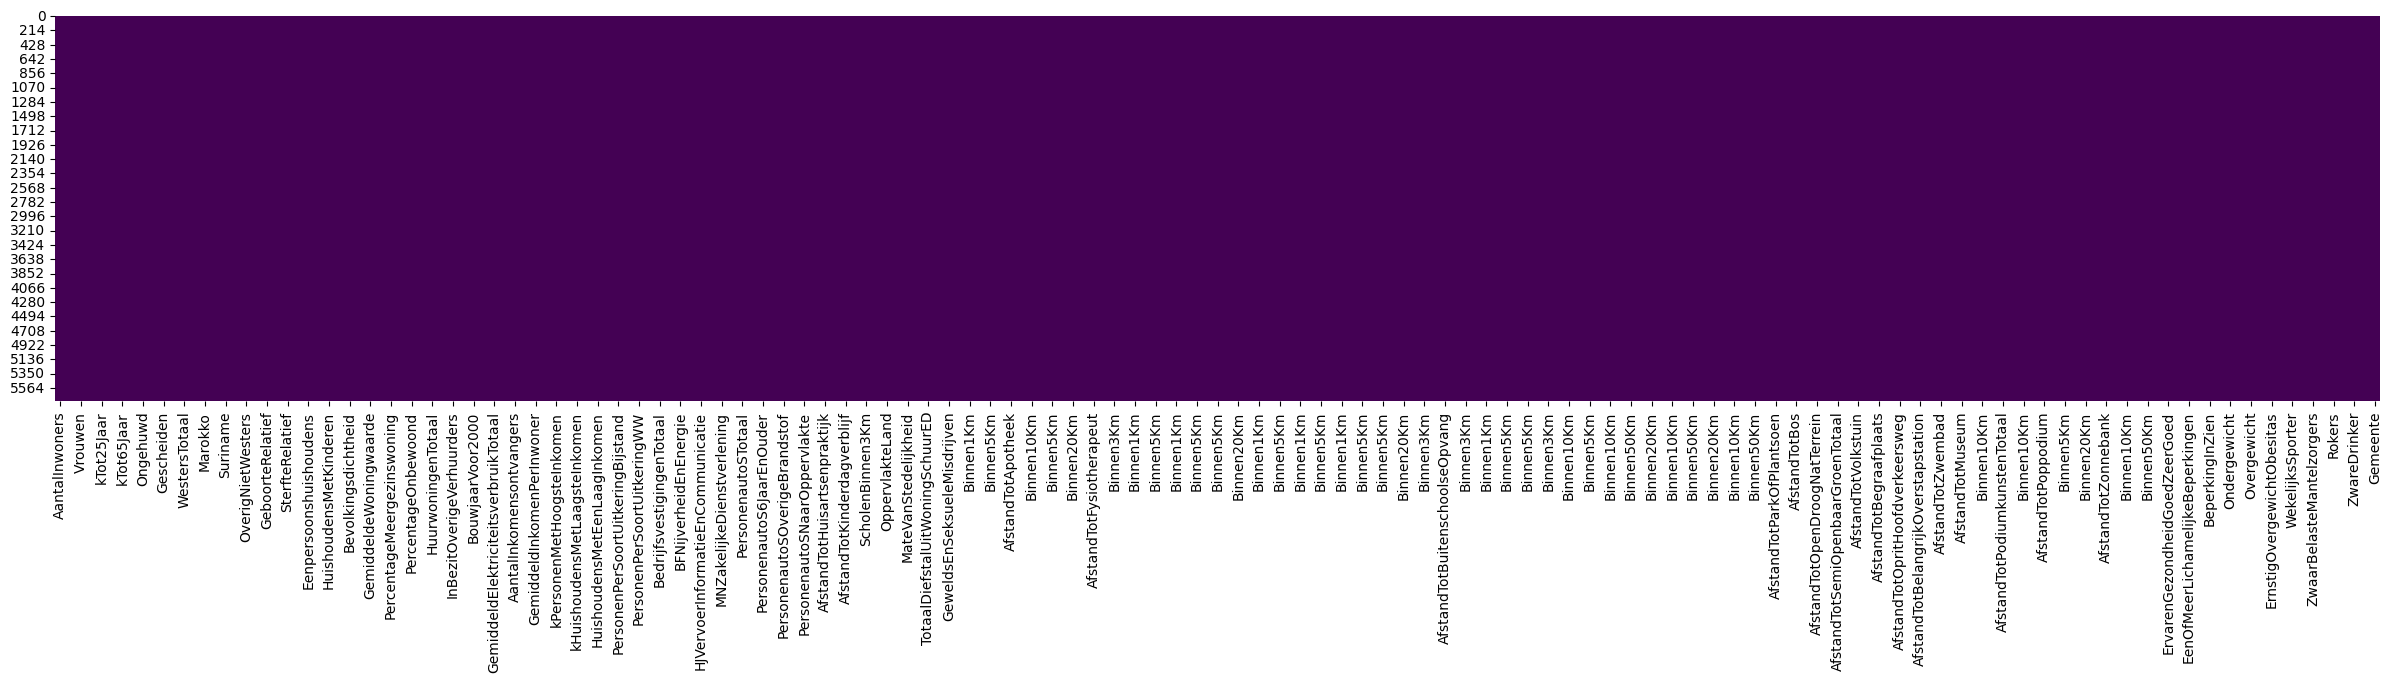

In [201]:
# View a plot with all NaN values Yellow
fig, ax = plt.subplots(figsize=(30, 5))
sns.heatmap(df_filled.isnull(),cbar=False,cmap='viridis')

In [202]:
# Checking for columns values
for col in df_cbsodata.columns:
    try:
        print('{}'.format(col))
    except:
        print(col)

Gemeente
AantalInwoners
Mannen
Vrouwen
kTot15Jaar
kTot25Jaar
kTot45Jaar
kTot65Jaar
kJaarOfOuder
Ongehuwd
Gehuwd
Gescheiden
Verweduwd
WestersTotaal
NietWestersTotaal
Marokko
NederlandseAntillenEnAruba
Suriname
Turkije
OverigNietWesters
GeboorteTotaal
GeboorteRelatief
SterfteTotaal
SterfteRelatief
HuishoudensTotaal
Eenpersoonshuishoudens
HuishoudensZonderKinderen
HuishoudensMetKinderen
GemiddeldeHuishoudensgrootte
Bevolkingsdichtheid
Woningvoorraad
GemiddeldeWoningwaarde
PercentageEengezinswoning
PercentageMeergezinswoning
PercentageBewoond
PercentageOnbewoond
Koopwoningen
HuurwoningenTotaal
InBezitWoningcorporatie
InBezitOverigeVerhuurders
EigendomOnbekend
BouwjaarVoor2000
BouwjaarVanaf2000
GemiddeldElektriciteitsverbruikTotaal
GemiddeldAardgasverbruikTotaal
AantalInkomensontvangers
GemiddeldInkomenPerInkomensontvanger
GemiddeldInkomenPerInwoner
kPersonenMetLaagsteInkomen
kPersonenMetHoogsteInkomen
Actieven1575Jaar
kHuishoudensMetLaagsteInkomen
kHuishoudensMetHoogsteInkomen
HuishoudensM

In [203]:
# Checking for possible values
for col in df_cbsodata.columns:
    try:
        print('{} : {}'.format(col,df_cbsodata[col].unique()))
    except:
        print(col)

Gemeente : ['Aa en Hunze' 'Aalsmeer' 'Aalten' 'Achtkarspelen' 'Alblasserdam'
 'Albrandswaard' 'Alkmaar' 'Almelo' 'Almere' 'Alphen aan den Rijn'
 'Alphen-Chaam' 'Ameland' 'Amersfoort' 'Amstelveen' 'Amsterdam'
 'Apeldoorn' 'Appingedam' 'Arnhem' 'Assen' 'Asten' 'Baarle-Nassau' 'Baarn'
 'Barendrecht' 'Barneveld' 'Beek' 'Beemster' 'Beesel' 'Berg en Dal'
 'Bergeijk' 'Bergen (L.)' 'Bergen (NH.)' 'Bergen op Zoom' 'Berkelland'
 'Bernheze' 'Best' 'Beuningen' 'Beverwijk' 'De Bilt' 'Bladel' 'Blaricum'
 'Bloemendaal' 'Bodegraven-Reeuwijk' 'Boekel' 'Borger-Odoorn' 'Borne'
 'Borsele' 'Boxmeer' 'Boxtel' 'Breda' 'Brielle' 'Bronckhorst' 'Brummen'
 'Brunssum' 'Bunnik' 'Bunschoten' 'Buren' 'Capelle aan den IJssel'
 'Castricum' 'Coevorden' 'Cranendonck' 'Cuijk' 'Culemborg' 'Dalfsen'
 'Dantumadiel' 'Delft' 'Delfzijl' 'Deurne' 'Deventer' 'Diemen'
 'Dinkelland' 'Doesburg' 'Doetinchem' 'Dongen' 'Dordrecht' 'Drechterland'
 'Drimmelen' 'Dronten' 'Druten' 'Duiven' 'Echt-Susteren' 'Edam-Volendam'
 'Ede' 'Eemnes' '

In [204]:
# Replace the exact string '.' with NaN values
df_cbsodata.replace('.', np.nan, inplace=True)

Reduce colums

In [205]:
# Drop all columns containing the word Binnen
df_cbsodata = df_cbsodata.filter(regex=r'^(?!.*Binnen).*$', axis=1)

In [206]:
# Checking all columns for duplicates
for col in df_cbsodata.columns:
    try:
        print('{}'.format(col))
    except:
        print(col)

Gemeente
AantalInwoners
Mannen
Vrouwen
kTot15Jaar
kTot25Jaar
kTot45Jaar
kTot65Jaar
kJaarOfOuder
Ongehuwd
Gehuwd
Gescheiden
Verweduwd
WestersTotaal
NietWestersTotaal
Marokko
NederlandseAntillenEnAruba
Suriname
Turkije
OverigNietWesters
GeboorteTotaal
GeboorteRelatief
SterfteTotaal
SterfteRelatief
HuishoudensTotaal
Eenpersoonshuishoudens
HuishoudensZonderKinderen
HuishoudensMetKinderen
GemiddeldeHuishoudensgrootte
Bevolkingsdichtheid
Woningvoorraad
GemiddeldeWoningwaarde
PercentageEengezinswoning
PercentageMeergezinswoning
PercentageBewoond
PercentageOnbewoond
Koopwoningen
HuurwoningenTotaal
InBezitWoningcorporatie
InBezitOverigeVerhuurders
EigendomOnbekend
BouwjaarVoor2000
BouwjaarVanaf2000
GemiddeldElektriciteitsverbruikTotaal
GemiddeldAardgasverbruikTotaal
AantalInkomensontvangers
GemiddeldInkomenPerInkomensontvanger
GemiddeldInkomenPerInwoner
kPersonenMetLaagsteInkomen
kPersonenMetHoogsteInkomen
Actieven1575Jaar
kHuishoudensMetLaagsteInkomen
kHuishoudensMetHoogsteInkomen
HuishoudensM

In [207]:
import pandas as pd

def find_and_remove_high_correlation_columns(df, threshold):
    while True:
        # Compute correlation matrix
        corr_matrix = df.drop(columns=['Gemeente', 'Perioden']).corr(method='spearman').abs()

        # Find columns with correlation above threshold
        high_corr_columns = {}
        for column in corr_matrix:
            correlated_columns = corr_matrix[column][corr_matrix[column] >= threshold].index.tolist()
            for corr_column in correlated_columns:
                if corr_column != column:
                    correlation = corr_matrix[column][corr_column]
                    if column in high_corr_columns:
                        high_corr_columns[column].append((corr_column, correlation))
                    else:
                        high_corr_columns[column] = [(corr_column, correlation)]

        if not high_corr_columns:
            break

        # Sort columns by correlation values in descending order
        sorted_columns = sorted(high_corr_columns.items(), key=lambda x: max([y[1] for y in x[1]]), reverse=True)

        print(f'Dropped column: {sorted_columns[0][0]}')
        df.drop(columns=[sorted_columns[0][0]], inplace=True)

    return df

# Example usage
df_cbsodata = find_and_remove_high_correlation_columns(df_cbsodata, 0.70)

print(df_cbsodata)


Dropped column: PercentageEengezinswoning
Dropped column: PercentageBewoond
Dropped column: BouwjaarVoor2000
Dropped column: kJaarOfOuder
Dropped column: AantalInwoners
Dropped column: HuishoudensTotaal
Dropped column: Mannen
Dropped column: Vrouwen
Dropped column: kTot65Jaar
Dropped column: Bevolkingsdichtheid
Dropped column: Woningvoorraad
Dropped column: PersonenautoSTotaal
Dropped column: Gehuwd
Dropped column: Ongehuwd
Dropped column: HuishoudensMetKinderen
Dropped column: Verweduwd
Dropped column: NormaalGewicht
Dropped column: HuishoudensZonderKinderen
Dropped column: AantalInkomensontvangers
Dropped column: Koopwoningen
Dropped column: kTot25Jaar
Dropped column: PersonenautoS6JaarEnOuder
Dropped column: kTot15Jaar
Dropped column: Gescheiden
Dropped column: SterfteTotaal
Dropped column: kTot45Jaar
Dropped column: PersonenPerSoortUitkeringAOW
Dropped column: HuishoudensMetEenLaagInkomen
Dropped column: GemiddeldInkomenPerInkomensontvanger
Dropped column: NietWestersTotaal
Dropped

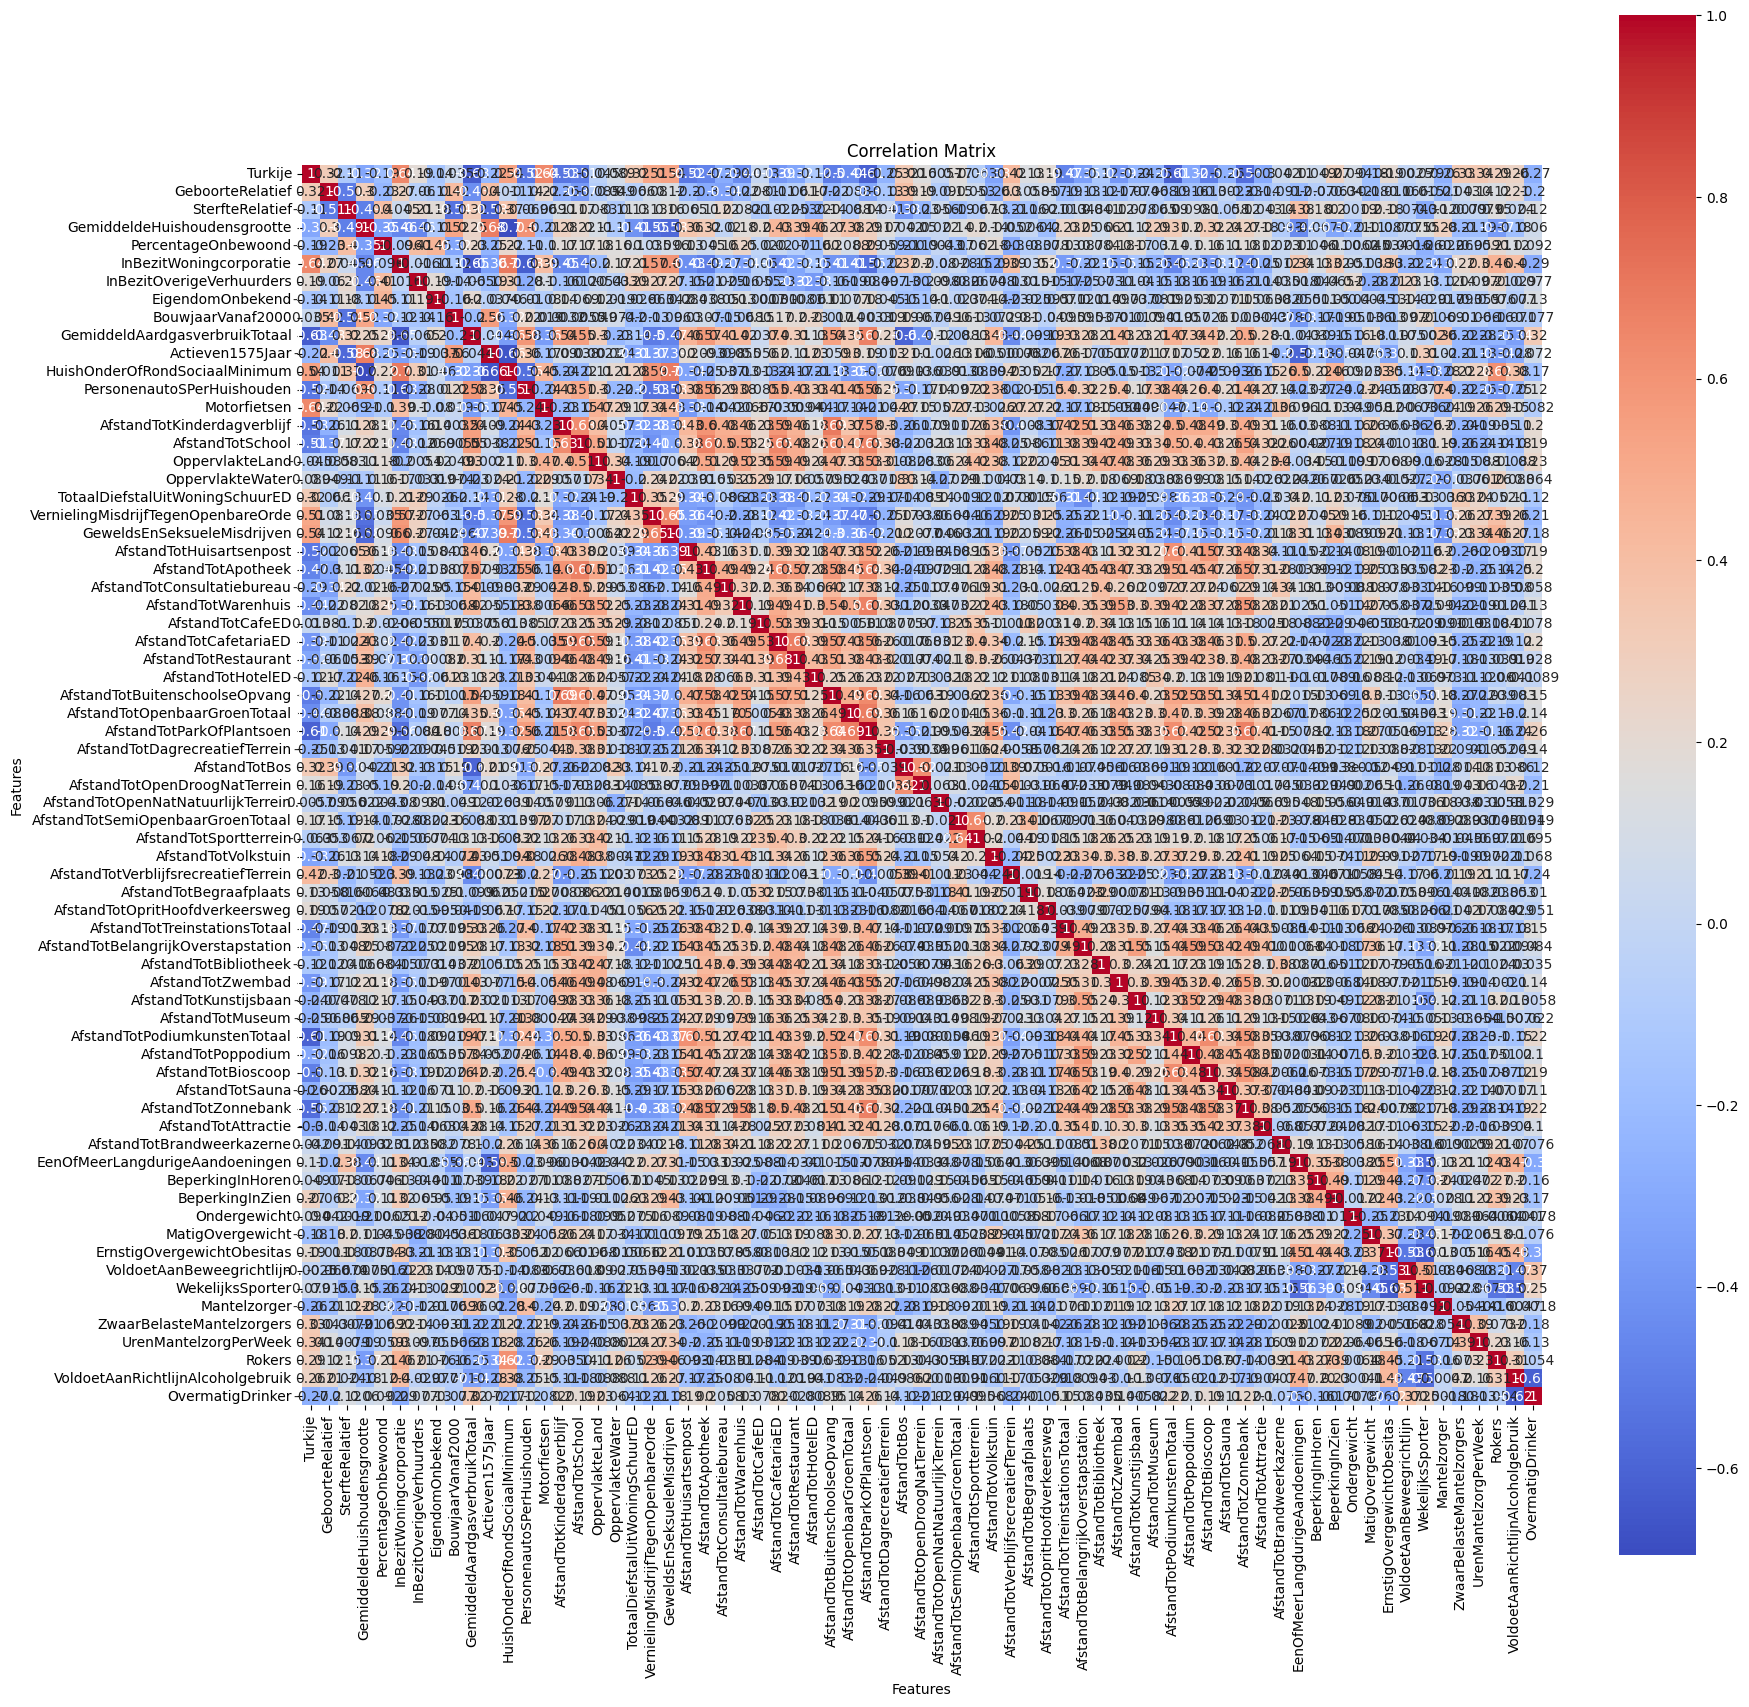

In [208]:
# Calculate the correlation matrix
corr_matrix = df_cbsodata.drop(columns=['Gemeente', 'Perioden']).corr(method='spearman')

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 20))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Add plot labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

In [209]:
# Used imports -- standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cbsodata
import time
from joblib import Parallel, delayed
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# miscelaneous imports
import gc


In [210]:
# Defining the function that you will run later
#https://github.com/K-Ellis/Neural-Network-Classification-and-Unbalanced-Bank-Marketing-Data/issues/1#issue-234132765
def calculate_vif_(X, thresh=5.0):
    variables = [X.columns[i] for i in range(X.shape[1])]
    dropped=True
    while dropped:
        dropped=False
        print(len(variables))
        vif = Parallel(n_jobs=-1,verbose=5)(delayed(variance_inflation_factor)(X[variables].values, ix) for ix in range(len(variables)))

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print(time.ctime() + ' dropping \'' + X[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables.pop(maxloc)
            dropped=True

    print('Remaining variables:')
    print(variables)
    
    return X[[i for i in variables]]

def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores

In [211]:
#remaining columns with vif score lower then 5
ListMulticollinearityVIFTestColumns = []
vif_scores(calculate_vif_(df_cbsodata.drop(columns=['Gemeente', 'Perioden']),5))

69


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  69 | elapsed:    7.9s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    8.2s finished


Thu Jun 29 10:45:09 2023 dropping 'GemiddeldeHuishoudensgrootte' at index: 3
68


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  59 out of  68 | elapsed:    2.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Thu Jun 29 10:45:13 2023 dropping 'Actieven1575Jaar' at index: 9
67


[Parallel(n_jobs=-1)]: Done  58 out of  67 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Thu Jun 29 10:45:16 2023 dropping 'MatigOvergewicht' at index: 57
66


[Parallel(n_jobs=-1)]: Done  57 out of  66 | elapsed:    2.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    2.9s finished


Thu Jun 29 10:45:19 2023 dropping 'EenOfMeerLangdurigeAandoeningen' at index: 53
65


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 out of  65 | elapsed:    2.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Thu Jun 29 10:45:22 2023 dropping 'VoldoetAanBeweegrichtlijn' at index: 57
64


[Parallel(n_jobs=-1)]: Done  54 out of  64 | elapsed:    2.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Thu Jun 29 10:45:25 2023 dropping 'VoldoetAanRichtlijnAlcoholgebruik' at index: 62
63


[Parallel(n_jobs=-1)]: Done  53 out of  63 | elapsed:    2.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    2.4s finished


Thu Jun 29 10:45:27 2023 dropping 'WekelijksSporter' at index: 57
62


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of  62 | elapsed:    2.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Thu Jun 29 10:45:30 2023 dropping 'PersonenautoSPerHuishouden' at index: 10
61


[Parallel(n_jobs=-1)]: Done  51 out of  61 | elapsed:    1.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Thu Jun 29 10:45:32 2023 dropping 'GemiddeldAardgasverbruikTotaal' at index: 8
60


[Parallel(n_jobs=-1)]: Done  50 out of  60 | elapsed:    1.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Thu Jun 29 10:45:34 2023 dropping 'Rokers' at index: 58
59


[Parallel(n_jobs=-1)]: Done  48 out of  59 | elapsed:    1.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Thu Jun 29 10:45:36 2023 dropping 'HuishOnderOfRondSociaalMinimum' at index: 8
58


[Parallel(n_jobs=-1)]: Done  47 out of  58 | elapsed:    1.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    1.7s finished


Thu Jun 29 10:45:38 2023 dropping 'Mantelzorger' at index: 54
57


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  57 | elapsed:    1.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  46 out of  57 | elapsed:    1.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    1.6s finished


Thu Jun 29 10:45:40 2023 dropping 'AfstandTotSemiOpenbaarGroenTotaal' at index: 31
56


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  56 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.5s finished


Thu Jun 29 10:45:42 2023 dropping 'ErnstigOvergewichtObesitas' at index: 52
55


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  55 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.4s finished


Thu Jun 29 10:45:43 2023 dropping 'AfstandTotSchool' at index: 10
54


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  54 | elapsed:    0.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  42 out of  54 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.3s finished


Thu Jun 29 10:45:45 2023 dropping 'SterfteRelatief' at index: 2
53


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  53 | elapsed:    0.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  30 out of  53 | elapsed:    0.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  41 out of  53 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    1.2s finished


Thu Jun 29 10:45:46 2023 dropping 'GeboorteRelatief' at index: 1
52


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  52 | elapsed:    0.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  40 out of  52 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    1.1s finished


Thu Jun 29 10:45:48 2023 dropping 'BeperkingInZien' at index: 47
51


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  51 | elapsed:    0.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  28 out of  51 | elapsed:    0.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Thu Jun 29 10:45:49 2023 dropping 'UrenMantelzorgPerWeek' at index: 49
50


[Parallel(n_jobs=-1)]: Done  16 out of  50 | elapsed:    0.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished


Thu Jun 29 10:45:51 2023 dropping 'AfstandTotSportterrein' at index: 28
49


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  49 | elapsed:    0.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  26 out of  49 | elapsed:    0.7s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  36 out of  49 | elapsed:    0.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Thu Jun 29 10:45:52 2023 dropping 'InBezitWoningcorporatie' at index: 2
48


[Parallel(n_jobs=-1)]: Done  15 out of  48 | elapsed:    0.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Thu Jun 29 10:45:53 2023 dropping 'AfstandTotRestaurant' at index: 18
47


[Parallel(n_jobs=-1)]: Done  34 out of  47 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  44 out of  47 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    0.8s finished


Thu Jun 29 10:45:54 2023 dropping 'BeperkingInHoren' at index: 43
46


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  46 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  43 out of  46 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    0.7s finished


Thu Jun 29 10:45:55 2023 dropping 'OvermatigDrinker' at index: 45
45


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.7s finished


Thu Jun 29 10:45:56 2023 dropping 'VernielingMisdrijfTegenOpenbareOrde' at index: 10
44


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  44 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  39 out of  44 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    0.6s finished


Thu Jun 29 10:45:57 2023 dropping 'InBezitOverigeVerhuurders' at index: 2
43


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  43 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  38 out of  43 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    0.5s finished


Thu Jun 29 10:45:57 2023 dropping 'ZwaarBelasteMantelzorgers' at index: 42
42


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  42 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  37 out of  42 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.5s finished


Thu Jun 29 10:45:58 2023 dropping 'AfstandTotOpenbaarGroenTotaal' at index: 18
41


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  41 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  41 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    0.5s finished


Thu Jun 29 10:45:59 2023 dropping 'AfstandTotBrandweerkazerne' at index: 39
40


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  40 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.6s finished


Thu Jun 29 10:45:59 2023 dropping 'Motorfietsen' at index: 4
39


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  39 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    0.5s finished


Thu Jun 29 10:46:00 2023 dropping 'AfstandTotCafetariaED' at index: 14
38


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  38 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  31 out of  38 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.4s finished


Thu Jun 29 10:46:01 2023 dropping 'PercentageOnbewoond' at index: 1
37


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  37 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  37 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.5s finished


Thu Jun 29 10:46:02 2023 dropping 'AfstandTotOpritHoofdverkeersweg' at index: 23
36


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  36 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.4s finished


Thu Jun 29 10:46:02 2023 dropping 'AfstandTotHuisartsenpost' at index: 8
35


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.3s finished


Thu Jun 29 10:46:03 2023 dropping 'GeweldsEnSeksueleMisdrijven' at index: 7
34


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  34 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  25 out of  34 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  34 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.4s finished


Thu Jun 29 10:46:03 2023 dropping 'AfstandTotBioscoop' at index: 29
33


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  33 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  24 out of  33 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  31 out of  33 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.3s finished


Thu Jun 29 10:46:04 2023 dropping 'BouwjaarVanaf2000' at index: 2
32


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  32 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  23 out of  32 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  32 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Thu Jun 29 10:46:04 2023 dropping 'AfstandTotApotheek' at index: 6
31


[Parallel(n_jobs=-1)]: Done  15 out of  31 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  22 out of  31 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  29 out of  31 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.2s finished


Thu Jun 29 10:46:05 2023 dropping 'AfstandTotBelangrijkOverstapstation' at index: 20
30


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  21 out of  30 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  28 out of  30 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


Thu Jun 29 10:46:05 2023 dropping 'Ondergewicht' at index: 29
29


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  29 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  18 out of  29 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  29 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Thu Jun 29 10:46:05 2023 dropping 'AfstandTotPodiumkunstenTotaal' at index: 24
28


[Parallel(n_jobs=-1)]: Done  11 out of  28 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  17 out of  28 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  23 out of  28 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.1s finished


Thu Jun 29 10:46:06 2023 dropping 'AfstandTotWarenhuis' at index: 7
27


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  27 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  16 out of  27 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  27 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Thu Jun 29 10:46:06 2023 dropping 'AfstandTotVerblijfsrecreatiefTerrein' at index: 16
26


[Parallel(n_jobs=-1)]: Done   9 out of  26 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  26 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  26 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.1s finished


Thu Jun 29 10:46:06 2023 dropping 'AfstandTotPoppodium' at index: 22
25


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  14 out of  25 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Thu Jun 29 10:46:07 2023 dropping 'AfstandTotZonnebank' at index: 23
24


[Parallel(n_jobs=-1)]: Done   6 out of  24 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  11 out of  24 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  16 out of  24 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  24 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.1s finished


Thu Jun 29 10:46:07 2023 dropping 'AfstandTotBos' at index: 12
23


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  23 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  23 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  23 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  23 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.1s finished


Thu Jun 29 10:46:07 2023 dropping 'AfstandTotConsultatiebureau' at index: 6
22
Thu Jun 29 10:46:08 2023 dropping 'AfstandTotAttractie' at index: 21
21


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  22 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   9 out of  22 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of  22 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  19 out of  22 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   8 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12

Thu Jun 29 10:46:08 2023 dropping 'AfstandTotKunstijsbaan' at index: 18
20
Remaining variables:
['Turkije', 'EigendomOnbekend', 'AfstandTotKinderdagverblijf', 'OppervlakteLand', 'OppervlakteWater', 'TotaalDiefstalUitWoningSchuurED', 'AfstandTotCafeED', 'AfstandTotHotelED', 'AfstandTotBuitenschoolseOpvang', 'AfstandTotParkOfPlantsoen', 'AfstandTotDagrecreatiefTerrein', 'AfstandTotOpenDroogNatTerrein', 'AfstandTotOpenNatNatuurlijkTerrein', 'AfstandTotVolkstuin', 'AfstandTotBegraafplaats', 'AfstandTotTreinstationsTotaal', 'AfstandTotBibliotheek', 'AfstandTotZwembad', 'AfstandTotMuseum', 'AfstandTotSauna']


Independent Features  VIF Scores
0                              Turkije    1.211772
1                     EigendomOnbekend    2.922939
2          AfstandTotKinderdagverblijf    3.997940
3                      OppervlakteLand    3.395477
4                     OppervlakteWater    1.678357
5      TotaalDiefstalUitWoningSchuurED    4.691568
6                     AfstandTotCafeED    4.382993
7                    AfstandTotHotelED    4.163848
8       AfstandTotBuitenschoolseOpvang    2.743318
9            AfstandTotParkOfPlantsoen    3.266641
10      AfstandTotDagrecreatiefTerrein    3.689553
11       AfstandTotOpenDroogNatTerrein    2.374739
12  AfstandTotOpenNatNatuurlijkTerrein    2.714417
13                 AfstandTotVolkstuin    4.838704
14             AfstandTotBegraafplaats    2.741073
15       AfstandTotTreinstationsTotaal    3.646558
16               AfstandTotBibliotheek    3.693331
17                   AfstandTotZwembad    4.460681
18                    AfstandTotMuseum    4.586883
19                     AfstandTotSauna    4.170910

Export data

In [213]:
df_cbsodata.to_csv('cbsdata_prep.csv', index=False)